<a href="https://colab.research.google.com/github/Amit2393/Uber_Data_Analysis/blob/main/uber_data_analysis_by_Amit_kumar_Rout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The project can be used to perform data visualization on the uber data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Uber.csv")

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


##Check for Missing Values.

In python missing values are represented as NaN i.e Not A Number

In [ ]:
df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

The above any() function checks each column and state that there is any missing values are or not.

## Lets find the numbers of missing values in the dataset

In [ ]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [ ]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

##Lets convert the START_DATE* & END_DATE* data type from object type to datetime format

In [ ]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format="%m/%d/%Y %H:%M")
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format="%m/%d/%Y %H:%M")

In [ ]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [ ]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for i in df['START_DATE*']:
    hour.append(i.hour)
    day.append(i.day)
    dayofweek.append(i.dayofweek)
    month.append(i.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR']=hour
df['DAY']=day
df['DAY_OF_WEEK']=dayofweek
df['MONTH']=month
df['WEEKDAY']=weekday

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


###Category we have

In [ ]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

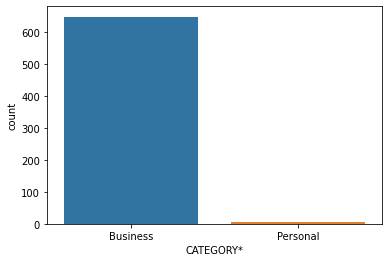

In [ ]:
sns.countplot(x='CATEGORY*',data=df);

We can clearly see that we have higher business rides than personal rides

##How long do people travel with Uber?

In [ ]:
df['MILES*'].value_counts()

9.9      26
3.1      21
10.4     17
3.0      13
2.1      13
         ..
36.6      1
2.6       1
310.3     1
6.8       1
16.5      1
Name: MILES*, Length: 205, dtype: int64

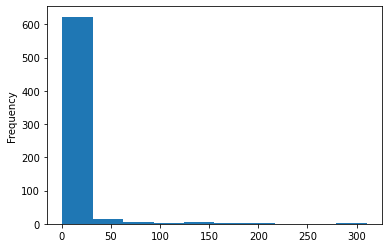

In [ ]:
df['MILES*'].plot.hist();

##**What Hour Do Most People Take Uber To Their Destination?**

Text(0.5, 1.0, 'Number of trips Vs hours')

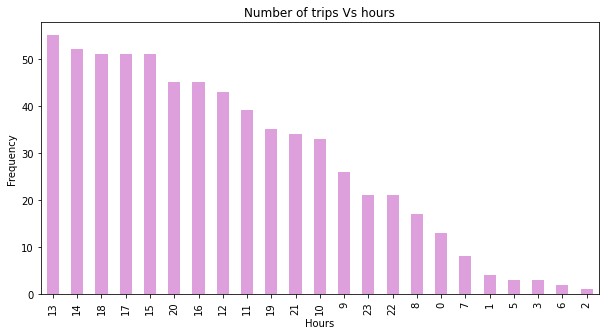

In [ ]:
hours = df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='PLUM',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

###From the above plot we can easily see that the most of bookings are done during 1PM-6PM and least during 2AM.So we can send notifications with some offer to ride people during 1PM-6PM that also increase our ride some how our revenue.

##Check The Purpose Of Trips

Now, this is quite important because if you know the purpose of the trip, you know which offer to give.You know, when to target,I mean, what kind of advertisements are to run?

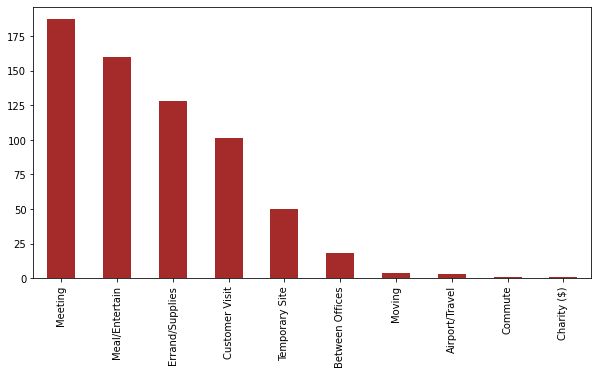

In [ ]:
purpose=df['PURPOSE*'].value_counts()
purpose.plot(kind='bar',figsize=(10,5),color='brown');

###you can see that most people go for meeting rates for the purpose of the of of their trip is meeting, followed by a meeting and entertainment rate and then some errands and supplies and then customer visits.



##Analysis of day with Highest number of Trip

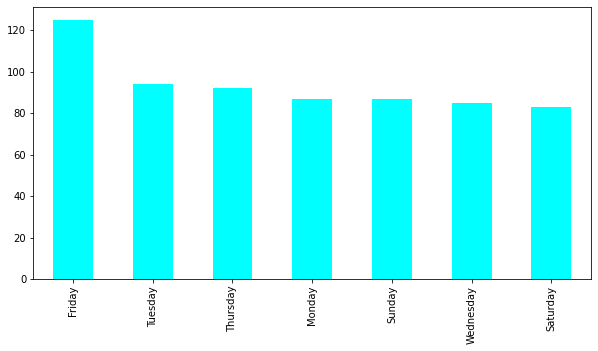

In [ ]:
day_with_Highest_trip=df['WEEKDAY'].value_counts()
day_with_Highest_trip.plot(kind='bar',figsize=(10,5),color='cyan');

###Now you can see the Friday is the day that most people book the trip.Followed by Tuesday, then Thursday,Then Sunday.So we can target these days for more trip.

## What Are The Number Of Trips Per Each Day?

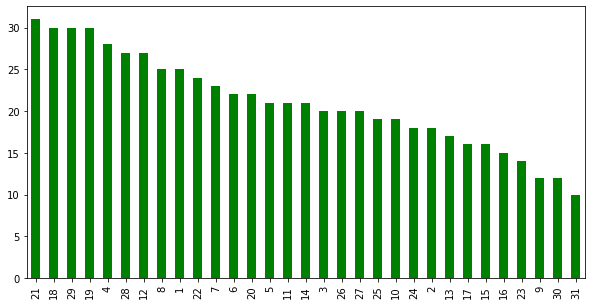

In [ ]:
day_wise_trip =df['DAY'].value_counts()
day_wise_trip.plot(kind='bar',figsize=(10,5),color='green');

##What Are The Trips In The Month

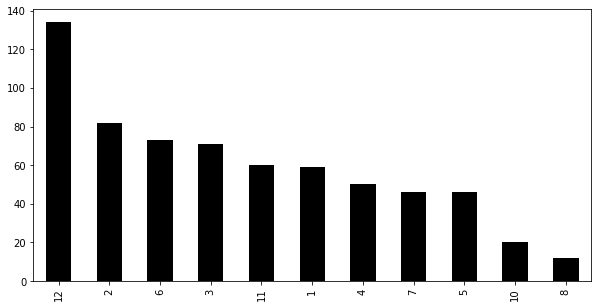

In [ ]:
month_wise_trip=df['MONTH'].value_counts()
month_wise_trip.plot(kind='bar',figsize=(10,5),color='black')

##The starting points of trips. Where Do People Start Boarding Their Trip From Most?

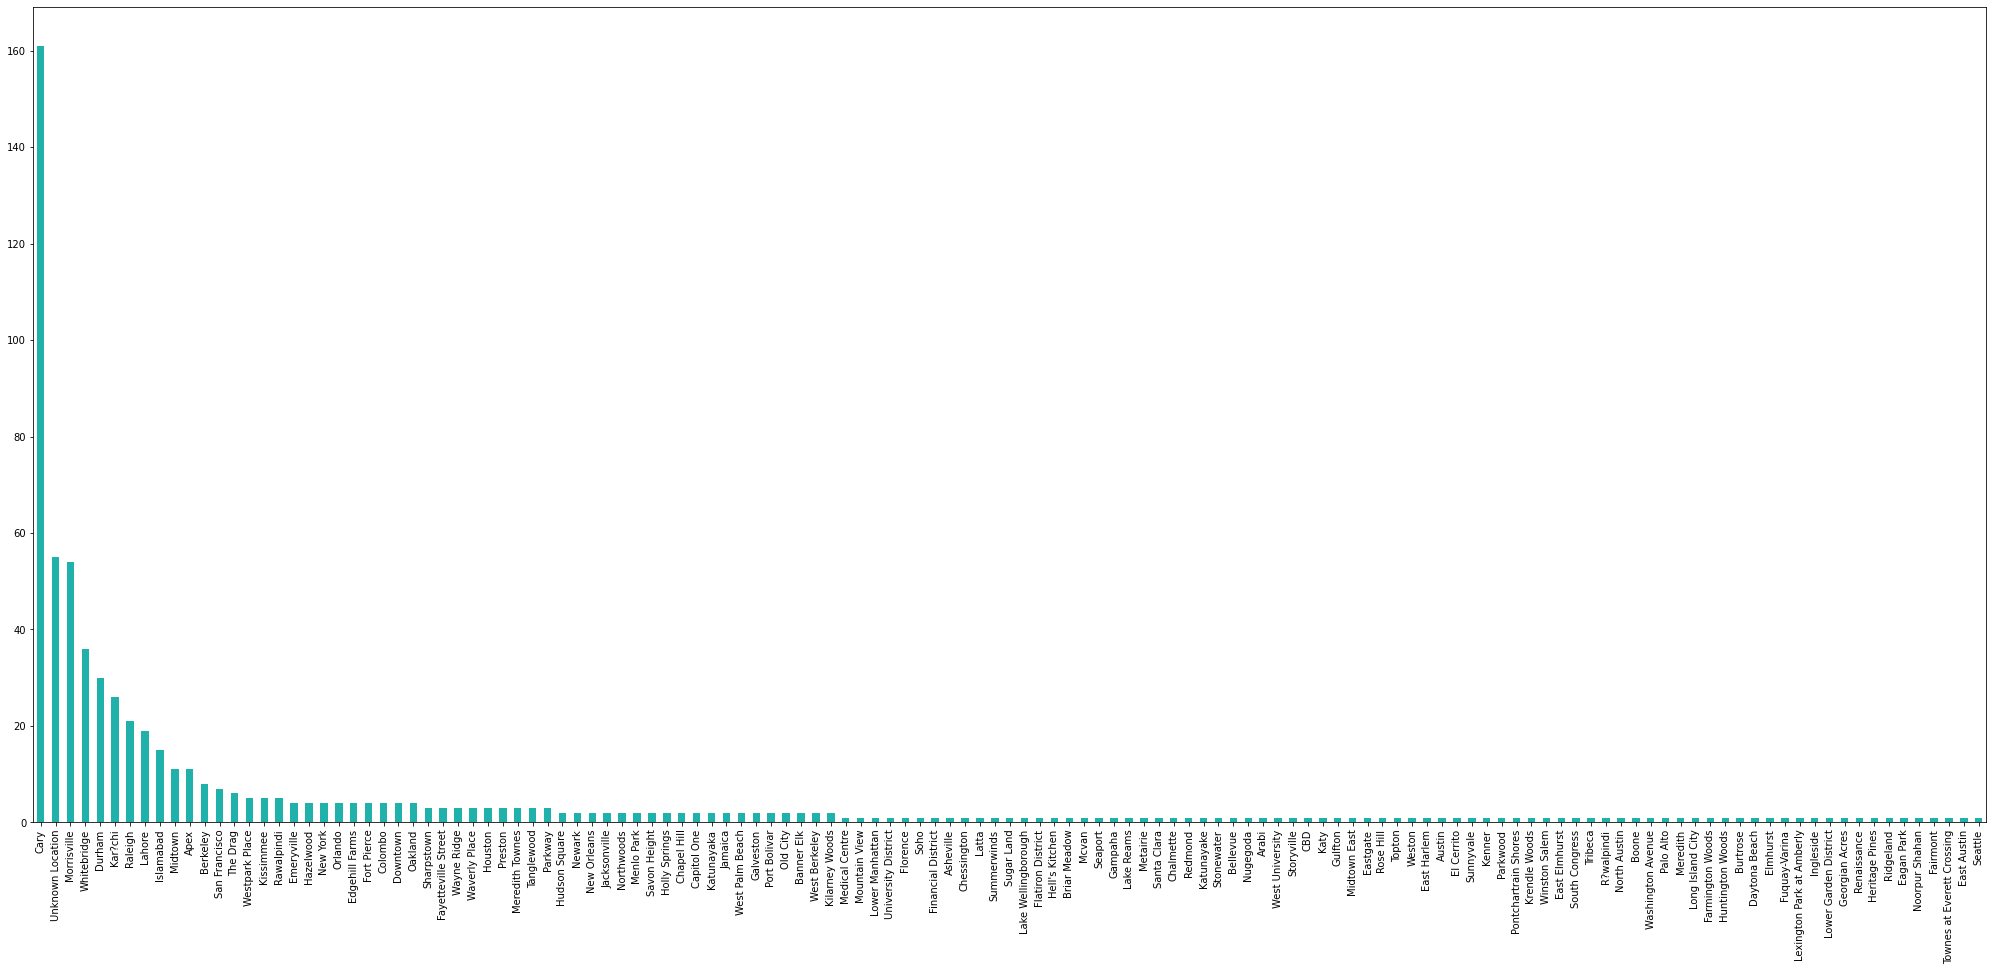

In [ ]:
starting_point=df['START*'].value_counts()
starting_point.plot(kind='bar',figsize=(35,15),color='lightseagreen');

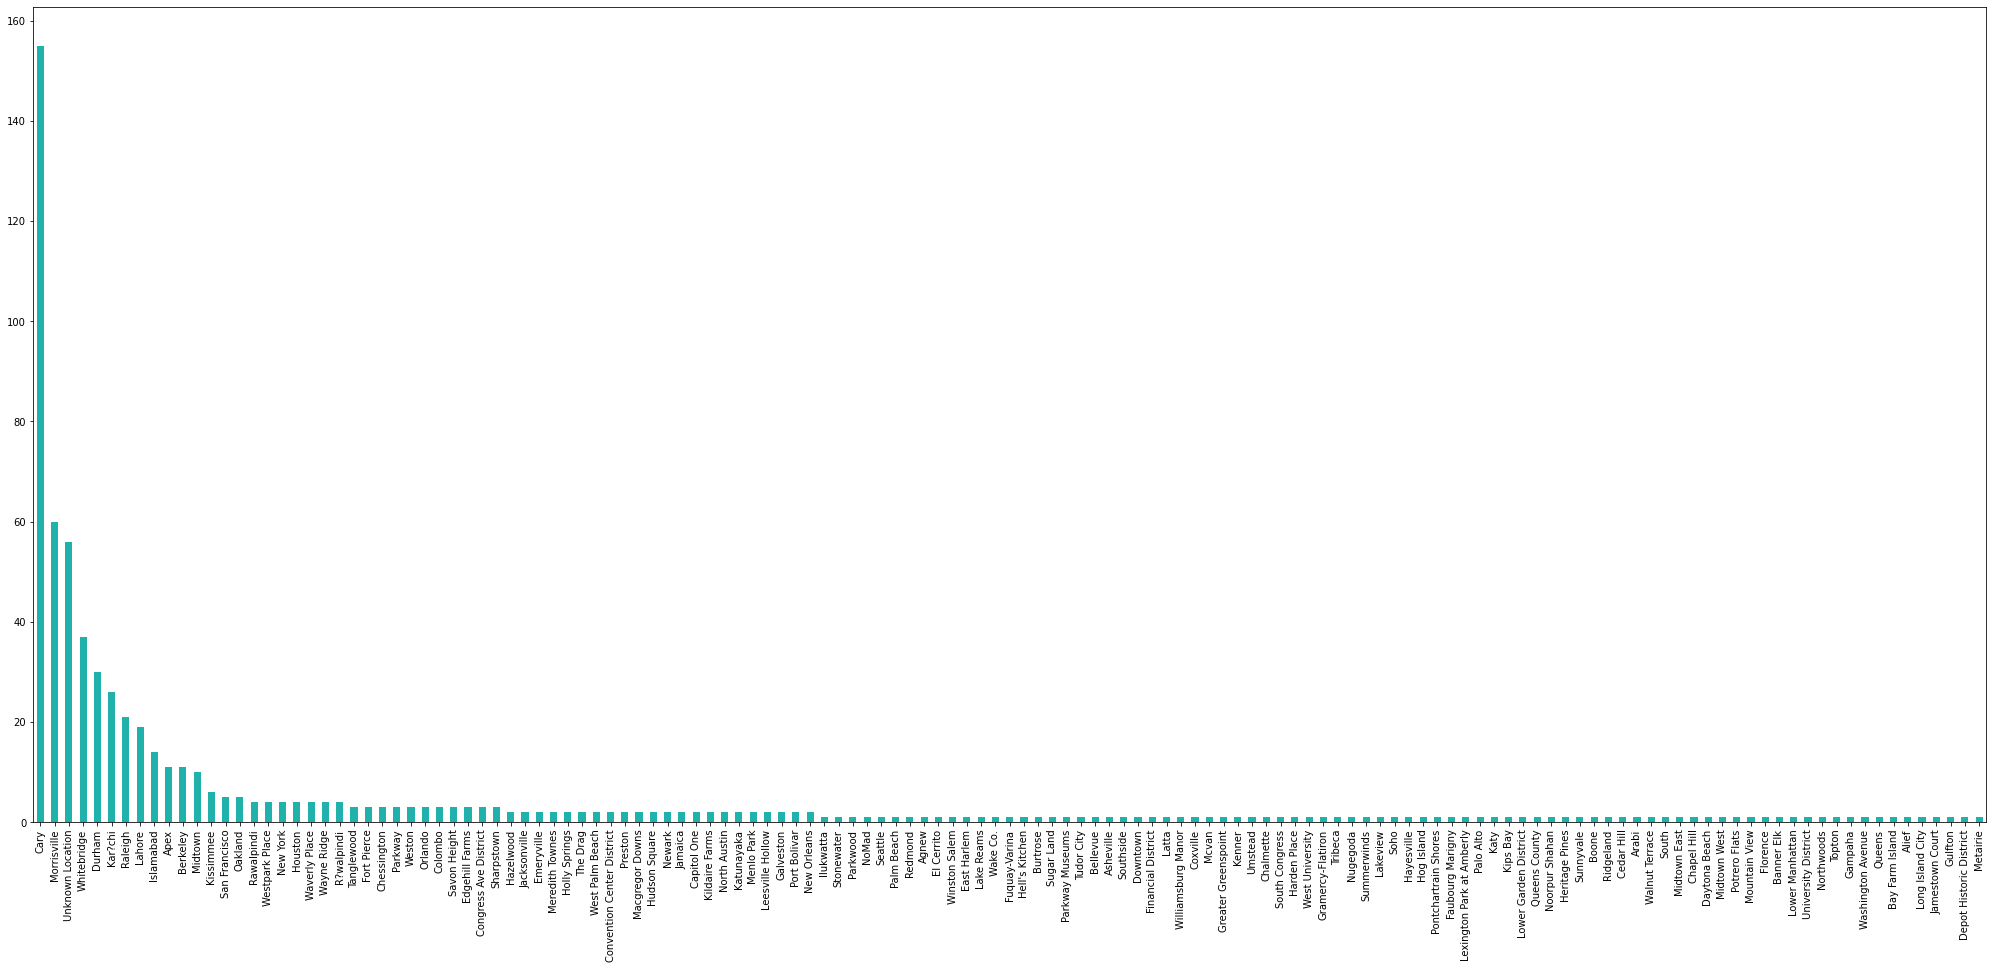

In [ ]:
stoping_point=df['STOP*'].value_counts()
stoping_point.plot(kind='bar',figsize=(35,15),color='lightseagreen');

##From the above plots you can see that CARY is the location which the favourite destination point for the travellers also from this place most of booking happened. If you google you can find that CARY is famous for renowed resturants ,world-class shopping,entertainment and wide range of leisure and ourdoor experience.